In [1]:
import pickle
from neuron_visualization.NeuronVisualizer import NeuronVisualizer
import pandas as pd

with open("models/rnn_sq_model.pkl", "rb") as f:
    model = pickle.load(f)
model.set_device("cpu")
visualizer = NeuronVisualizer(model)
data = pd.read_csv("data/square_data1000_50steps.csv")
# data = data[data['run_id'].isin([0, 1])]
print(data.shape)
visualizer.retrieve_activations(data, use_predicted=True)


(36301, 11)


100%|██████████| 1000/1000 [00:11<00:00, 83.59it/s]


100%|██████████| 100/100 [00:02<00:00, 36.29it/s]


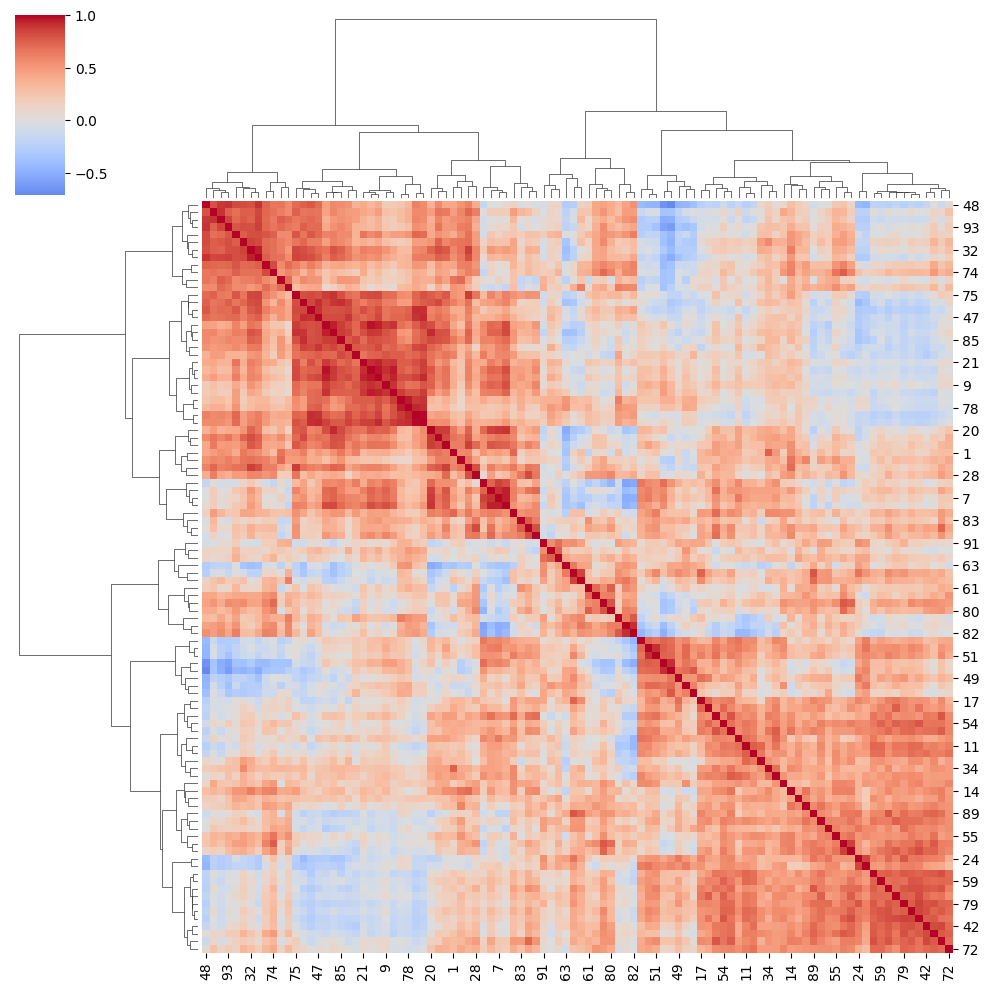

In [2]:
from matplotlib import pyplot as plt
import numpy as np
maps = visualizer.get_spatial_maps(absolute=True)
cos_sims = visualizer.compute_cos_sim_on_maps(maps)
# plt.imshow(cos_sims, cmap='bwr', vmin=-1, vmax=1)
# plt.colorbar()
# plt.title("Cosine similarity between spatial maps of different neurons")
# plt.show()
import seaborn as sns
import scipy.cluster.hierarchy as sch

linkage = sch.linkage(1 - cos_sims, method='ward')
sns.clustermap(cos_sims, row_linkage=linkage, col_linkage=linkage, cmap='coolwarm', center=0)

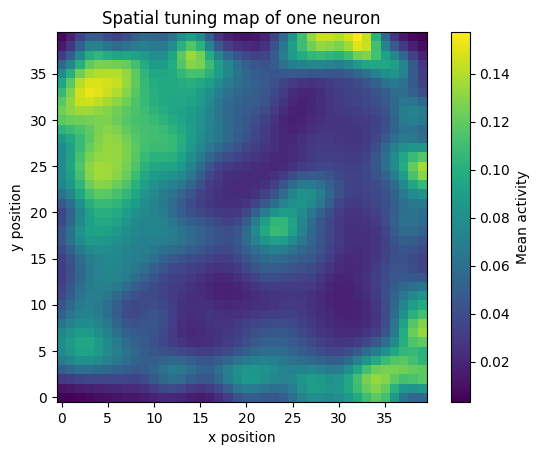

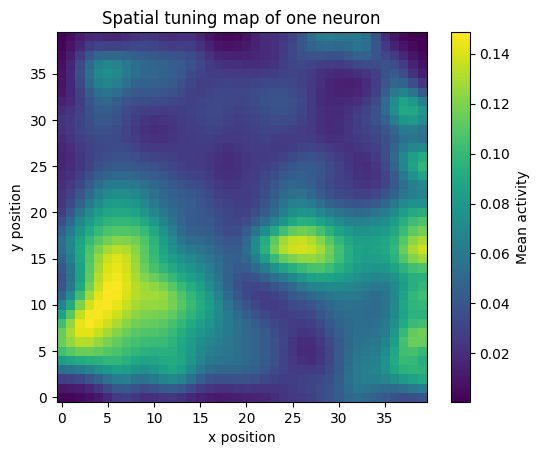

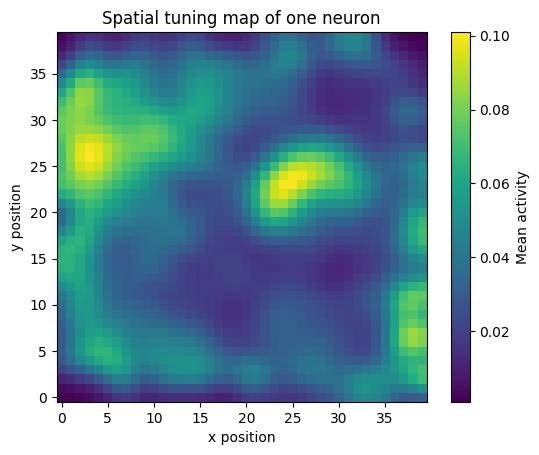

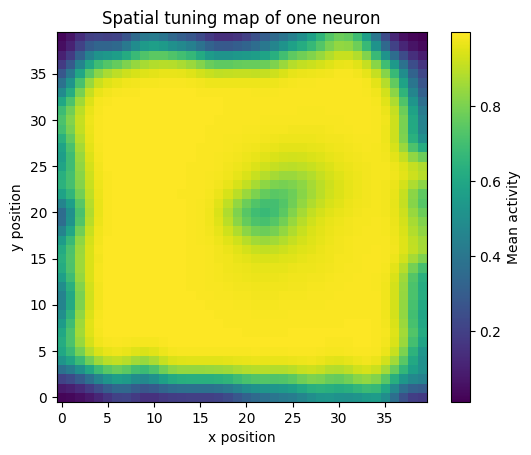

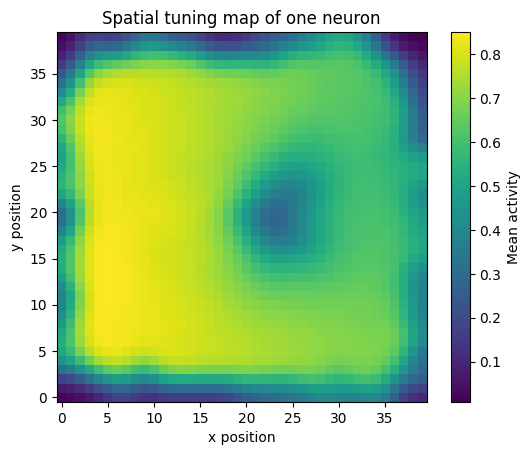

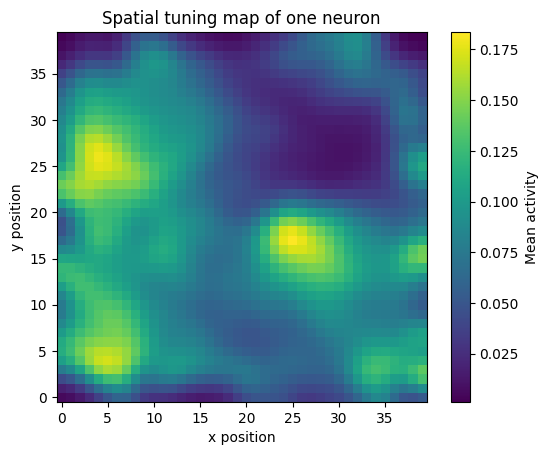

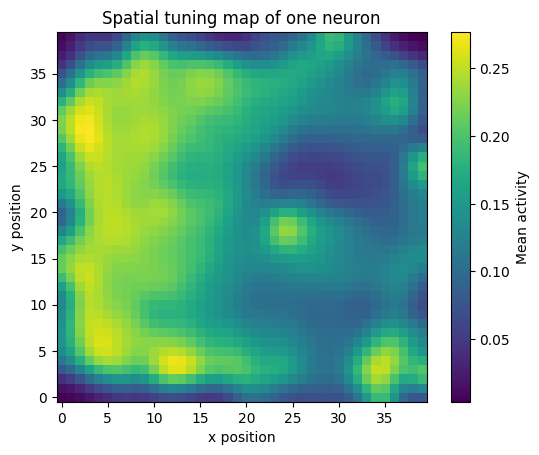

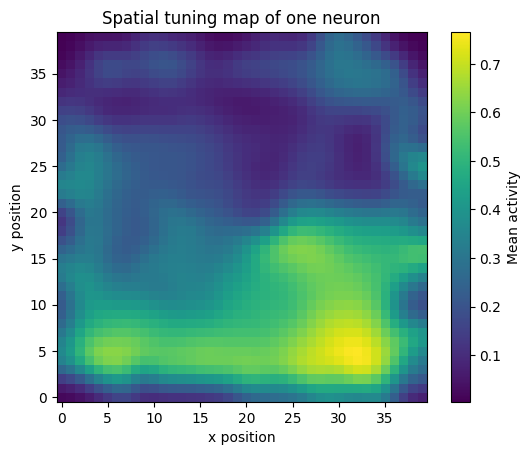

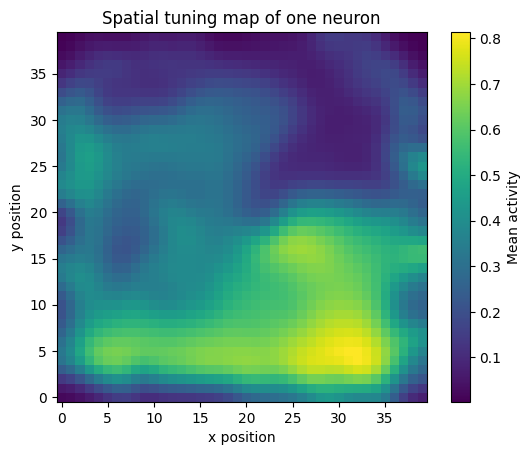

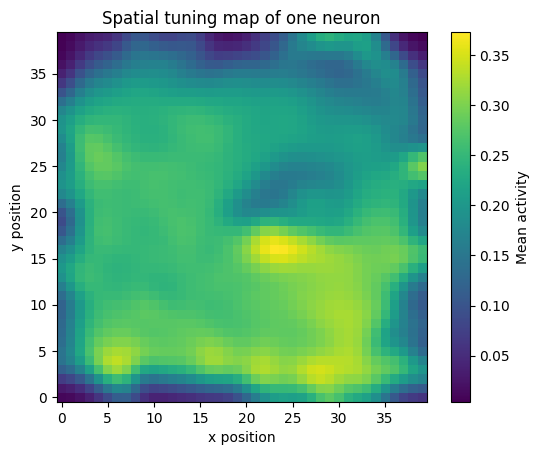

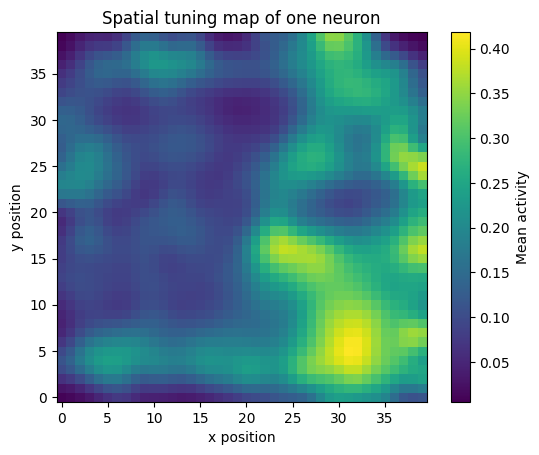

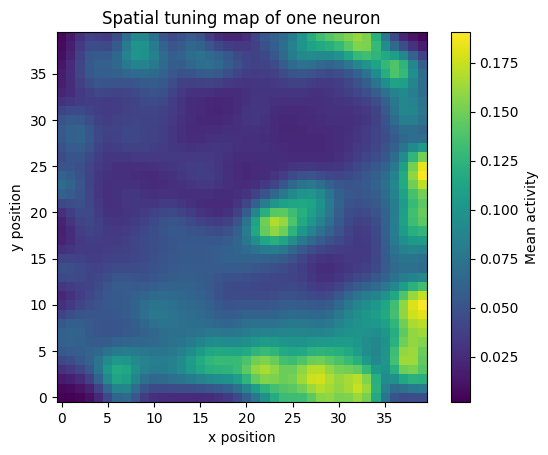

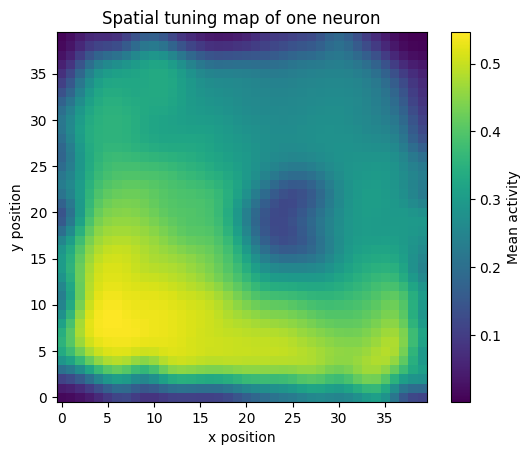

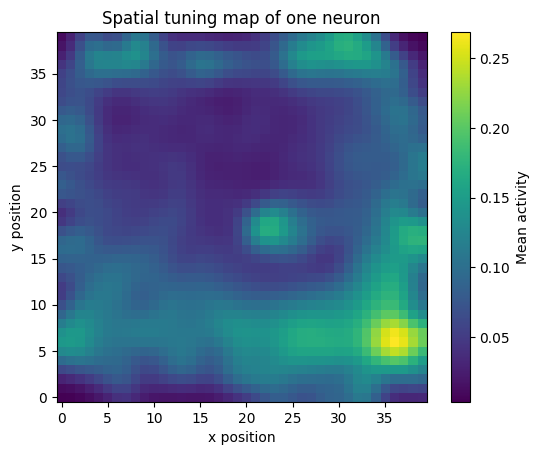

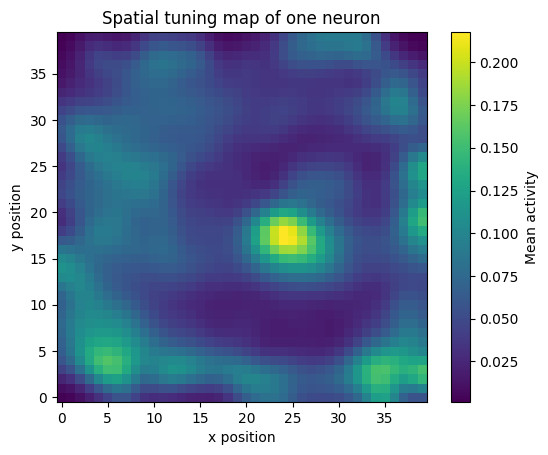

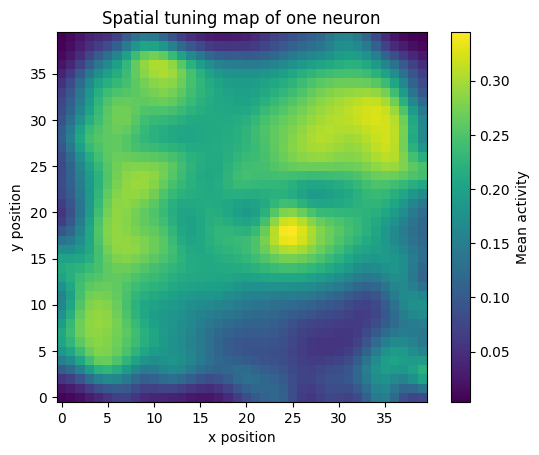

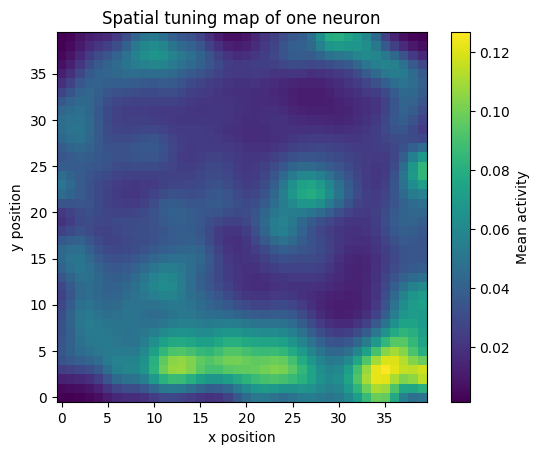

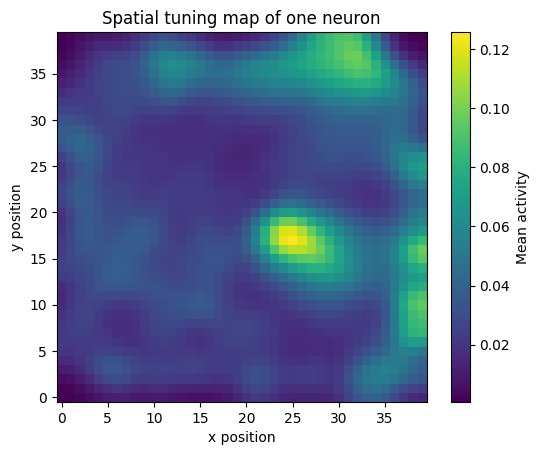

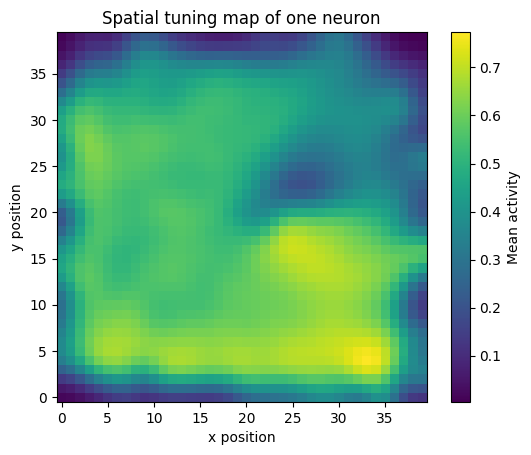

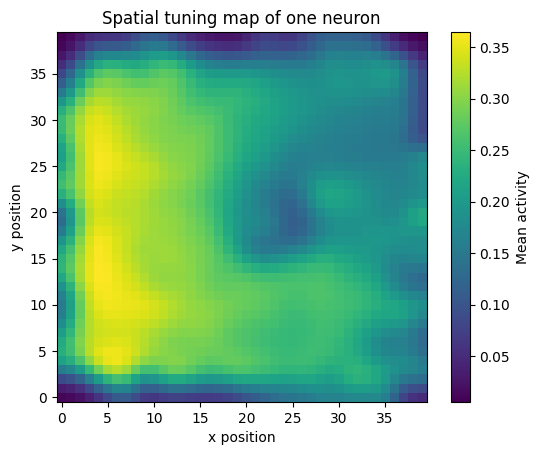

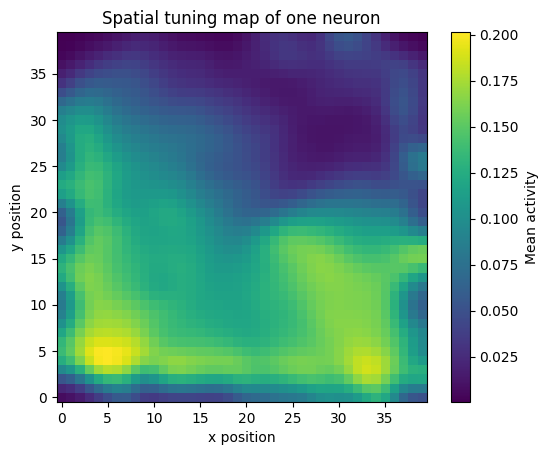

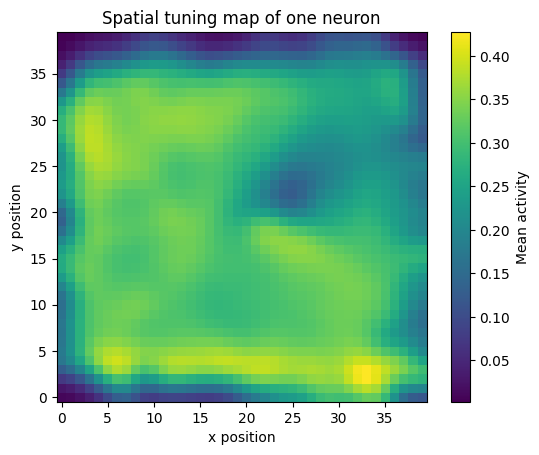

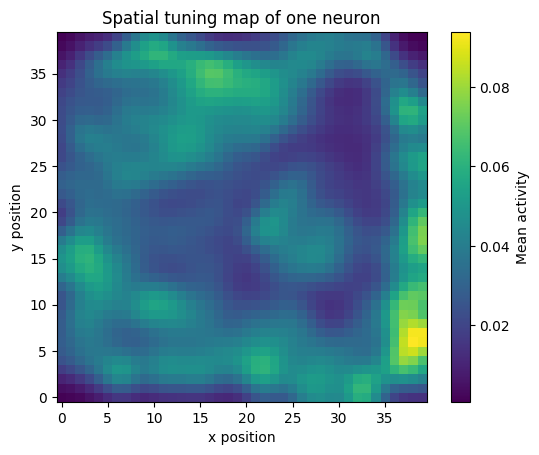

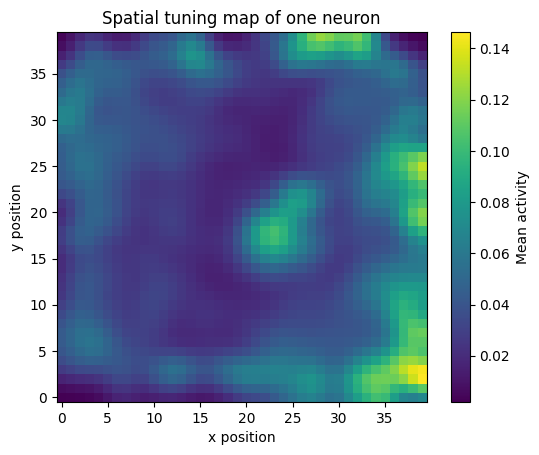

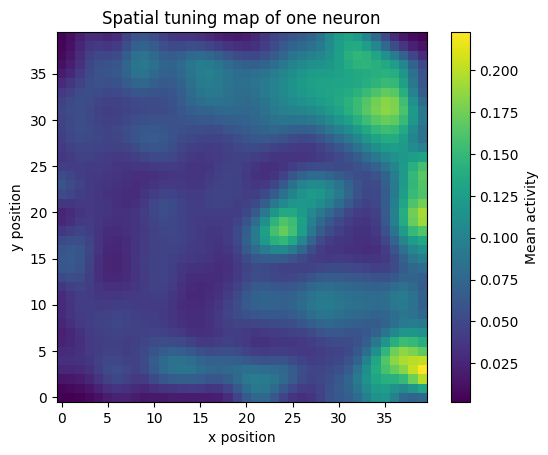

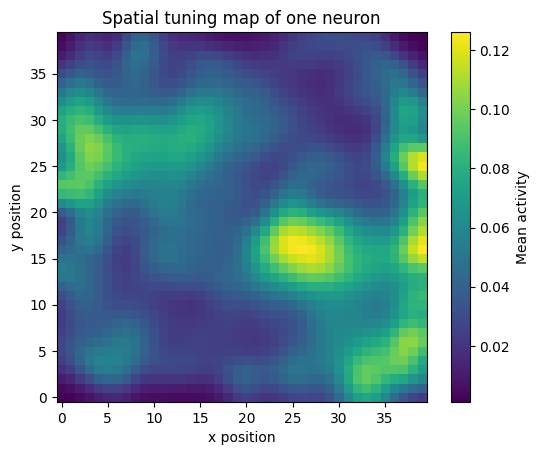

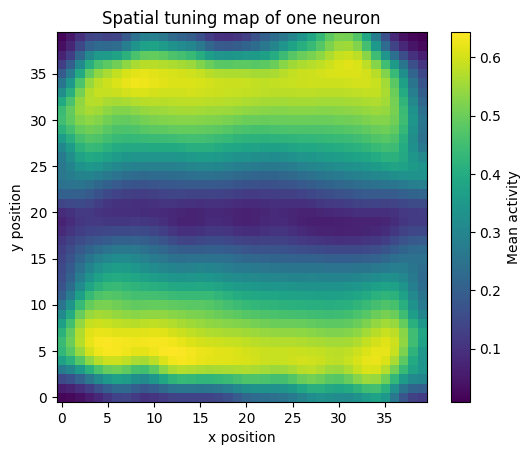

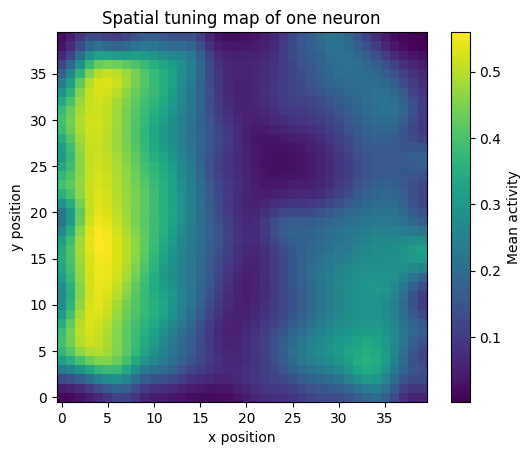

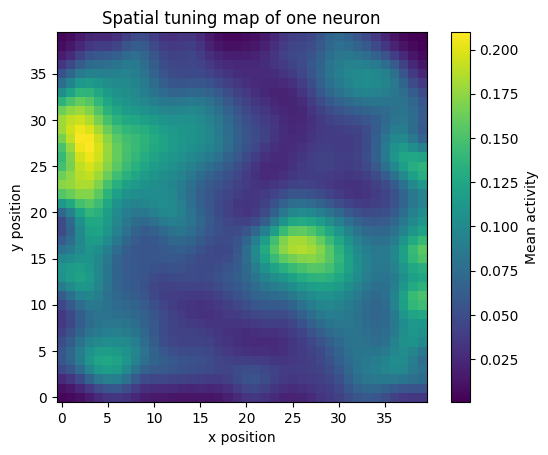

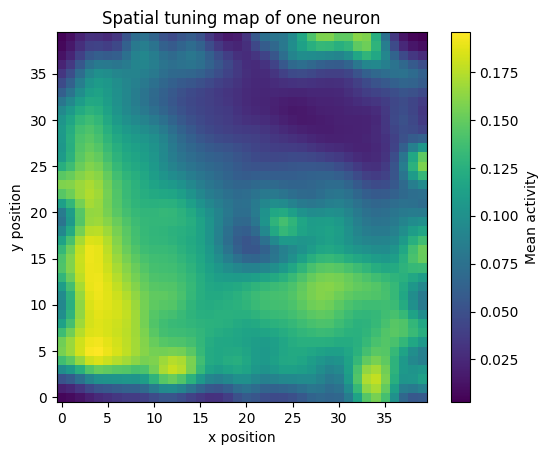

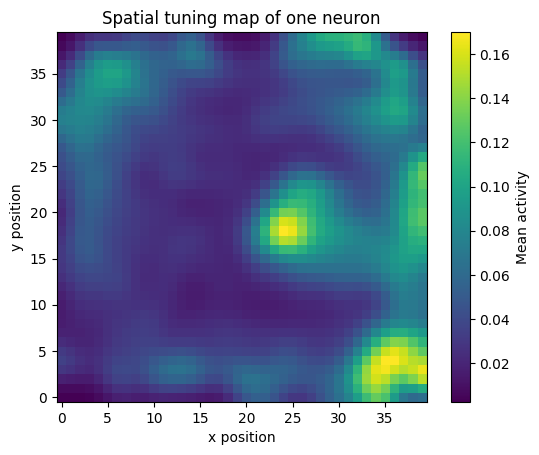

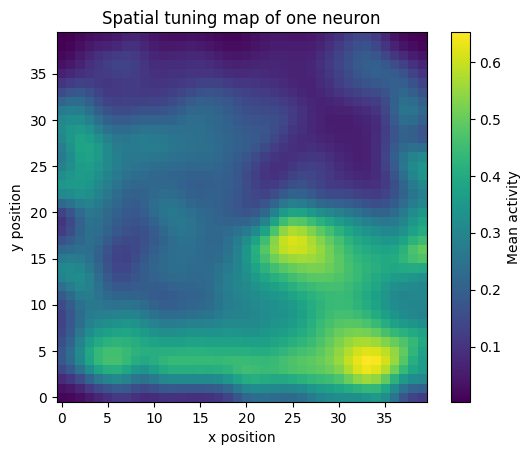

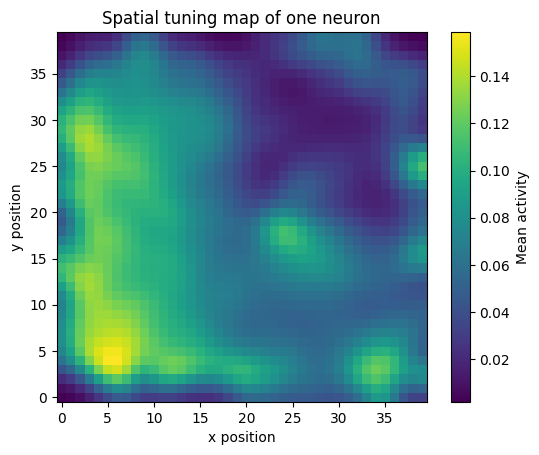

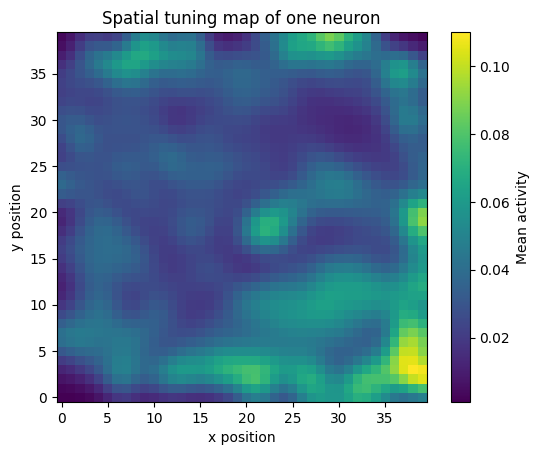

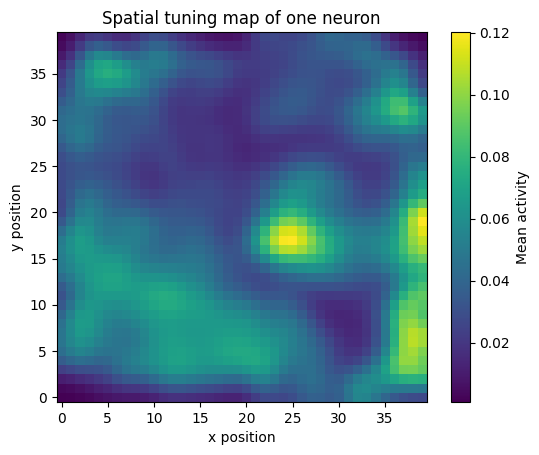

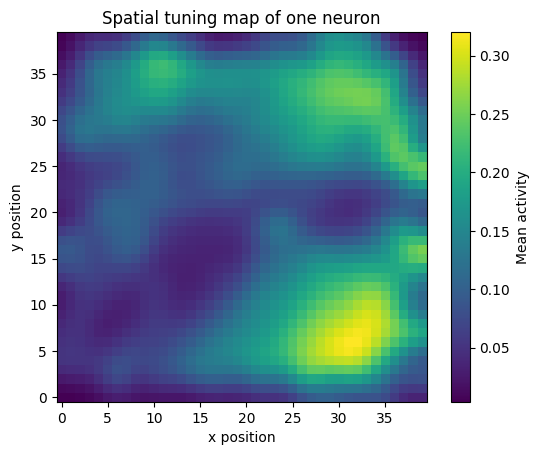

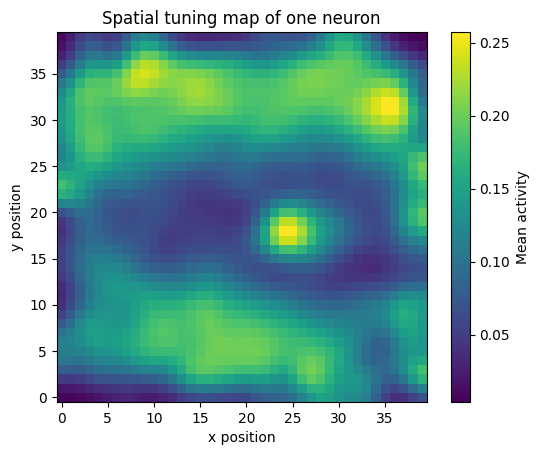

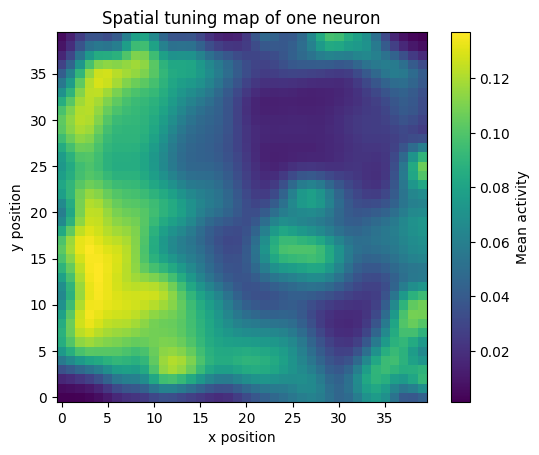

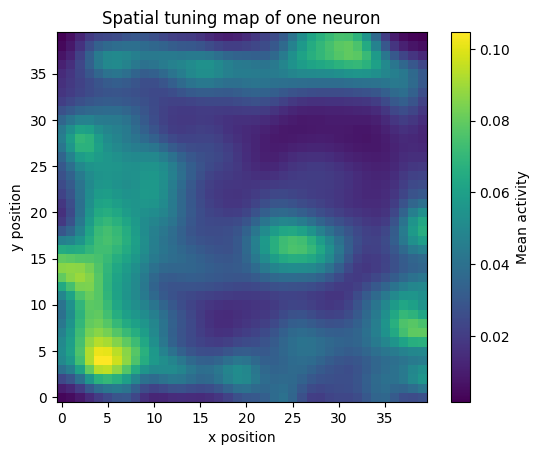

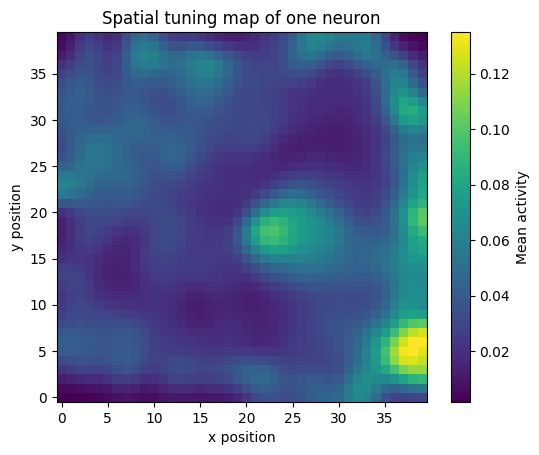

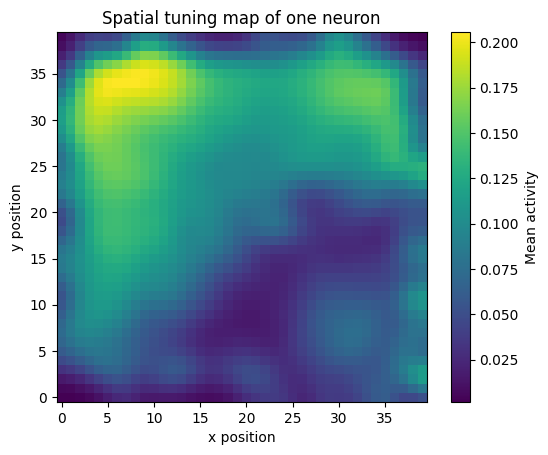

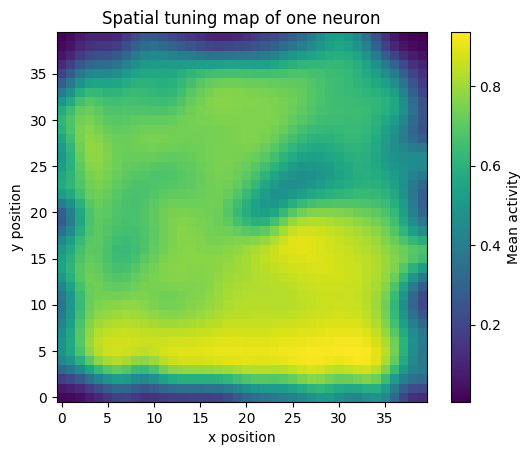

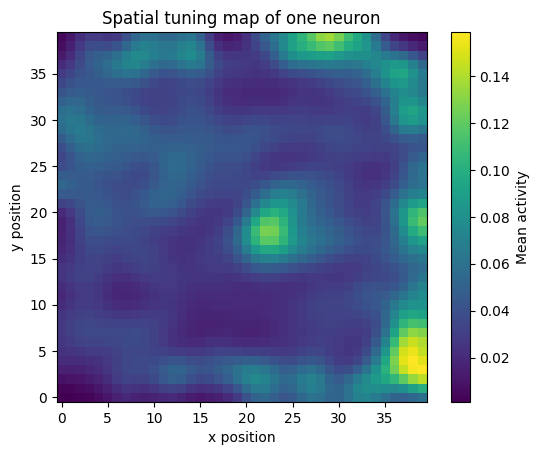

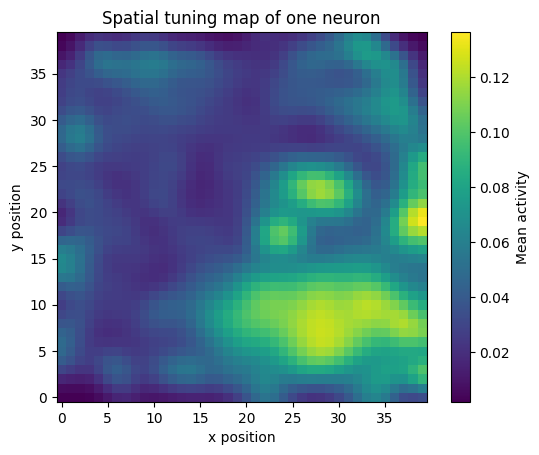

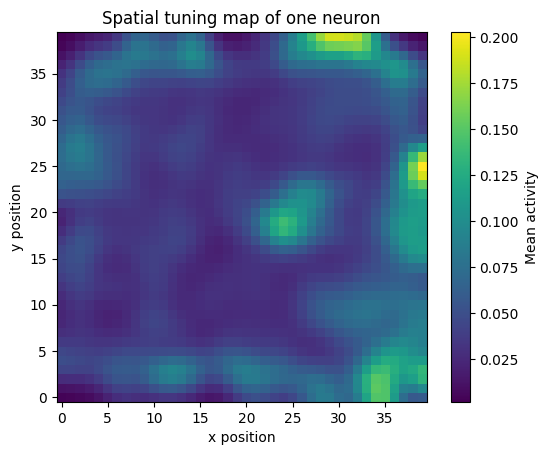

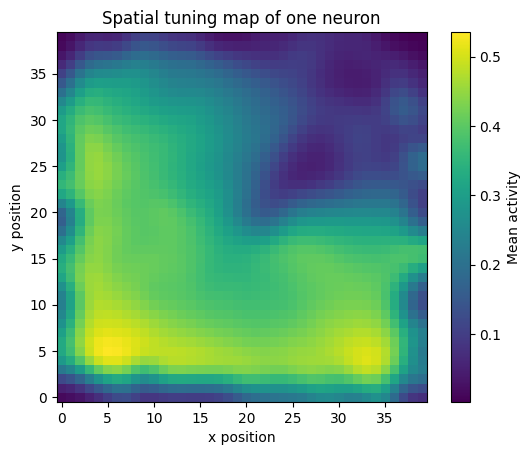

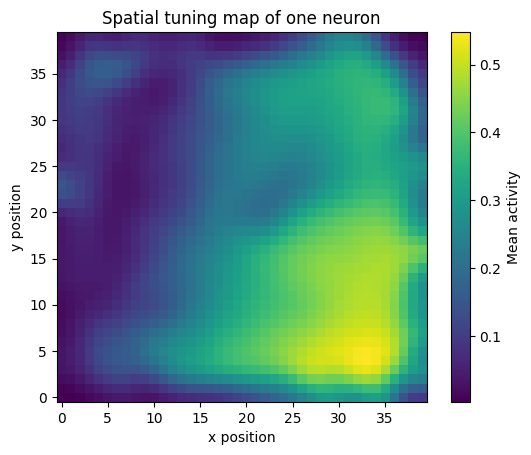

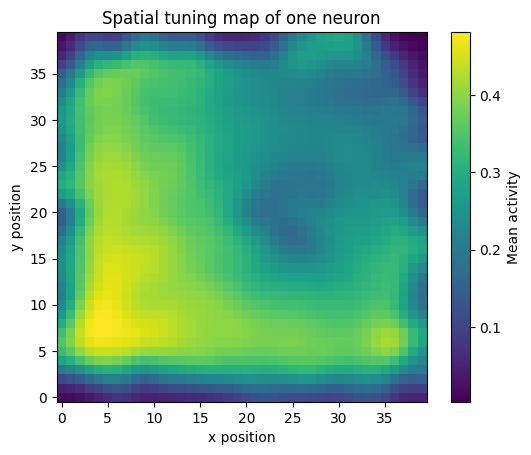

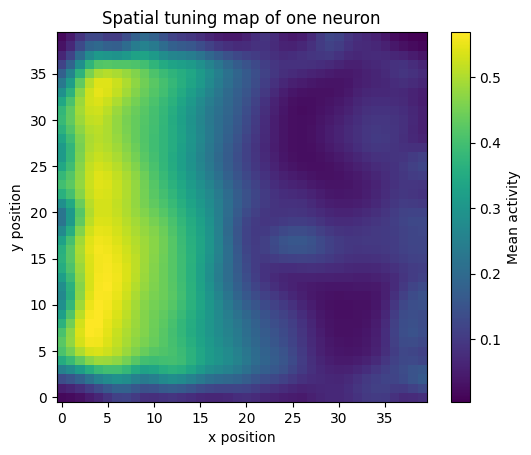

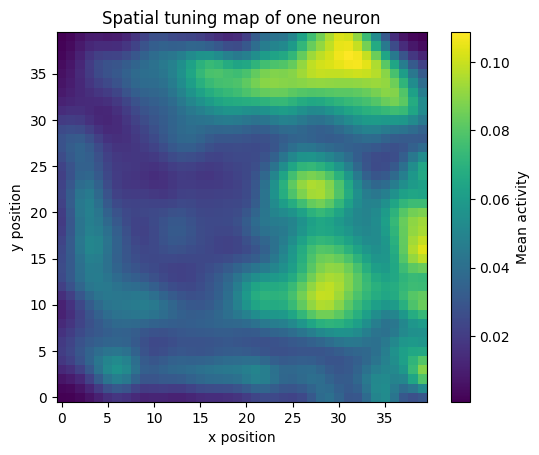

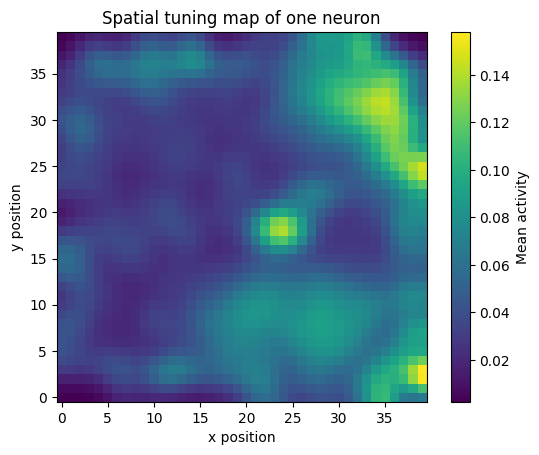

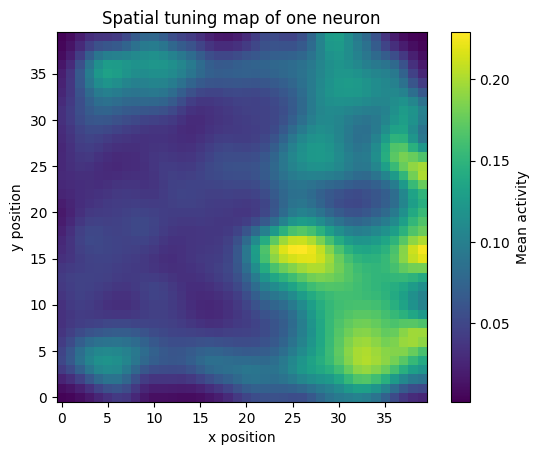

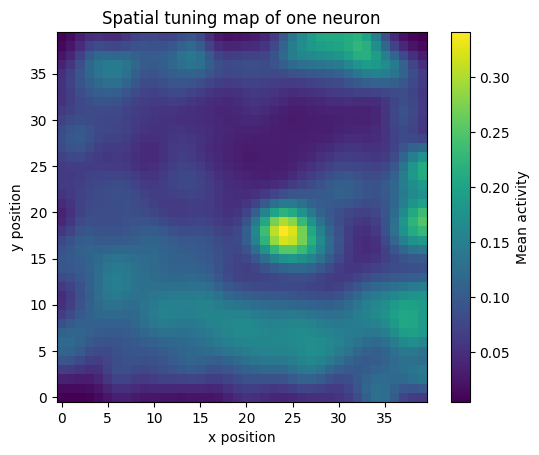

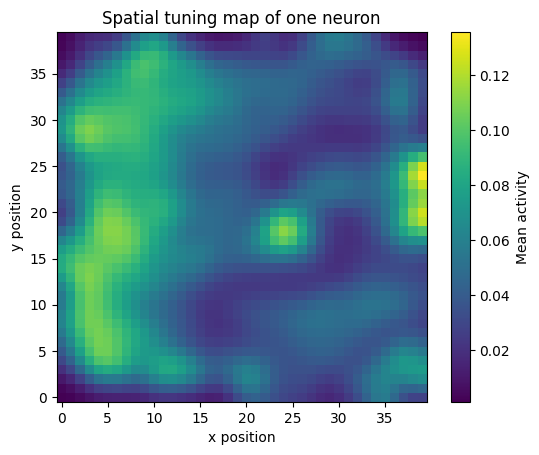

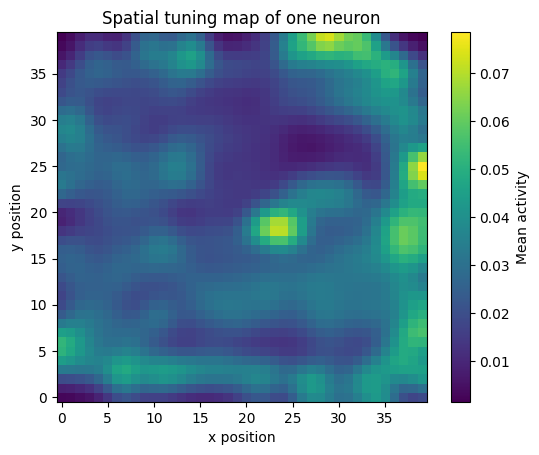

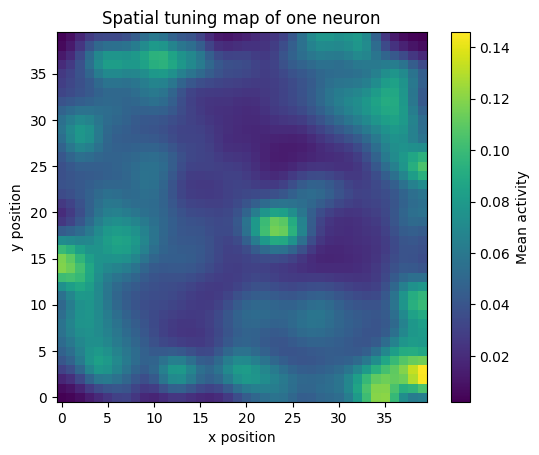

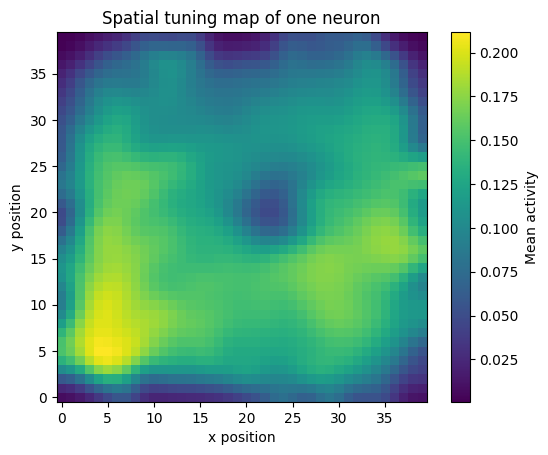

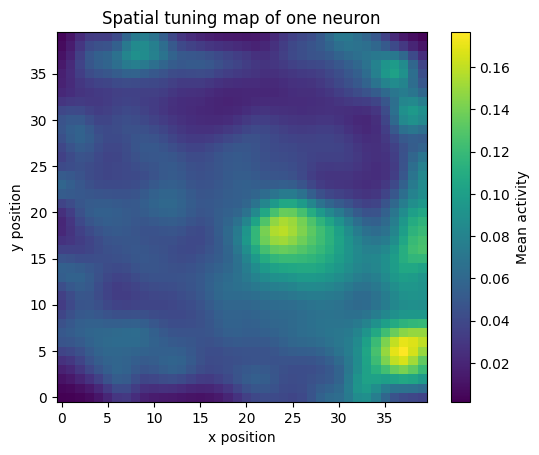

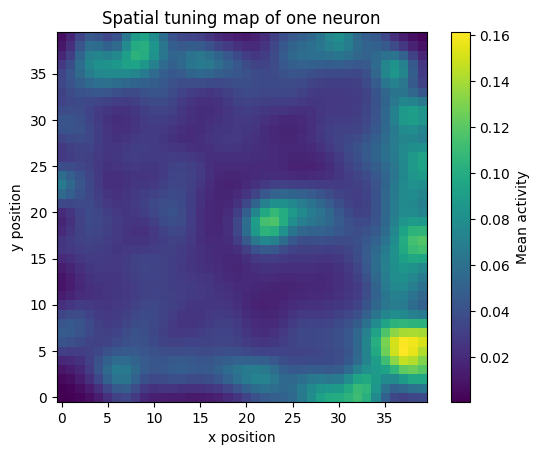

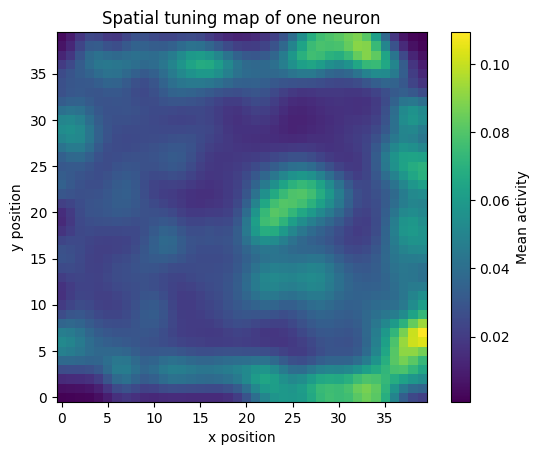

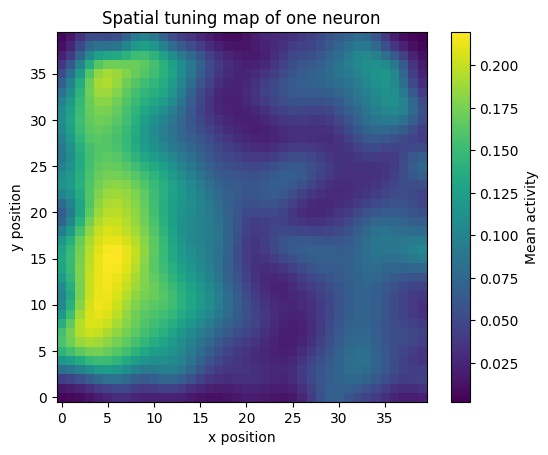

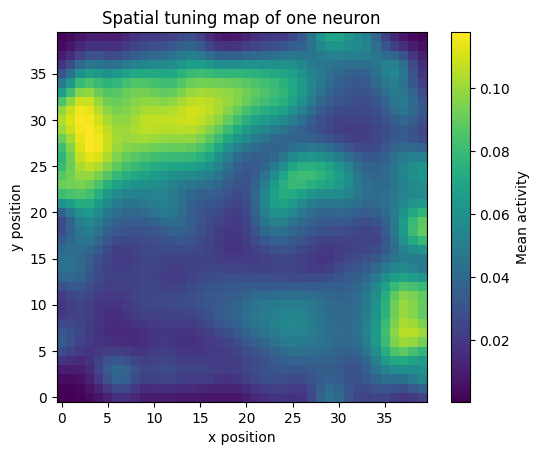

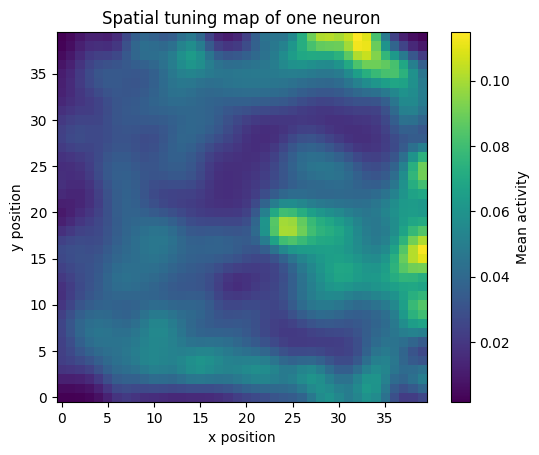

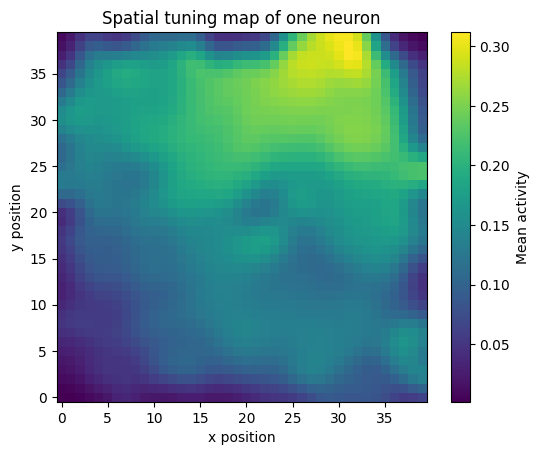

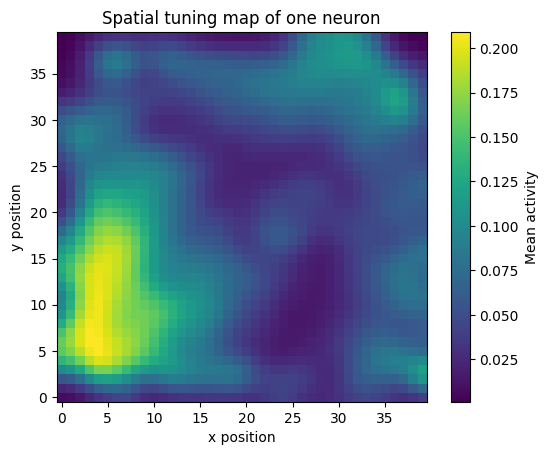

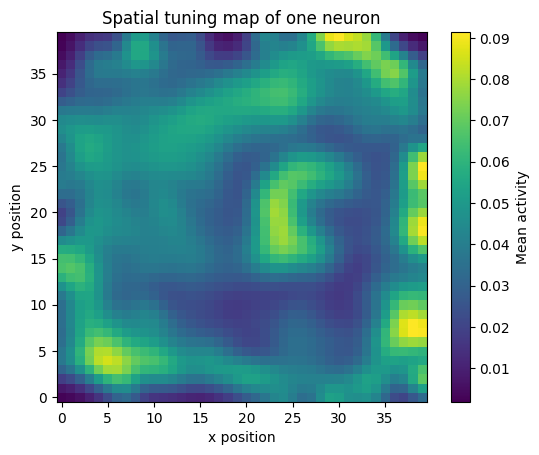

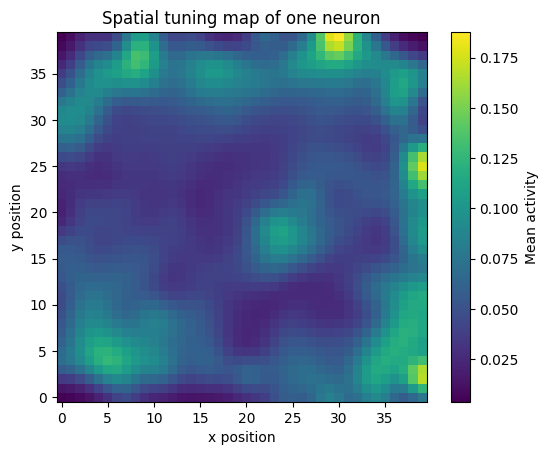

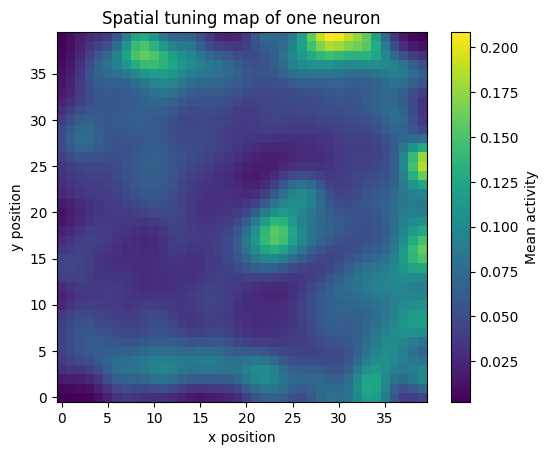

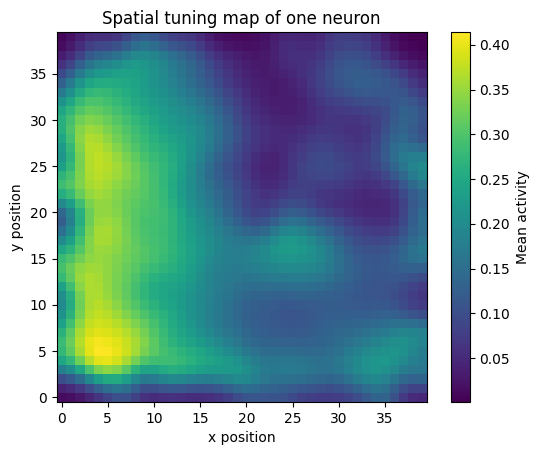

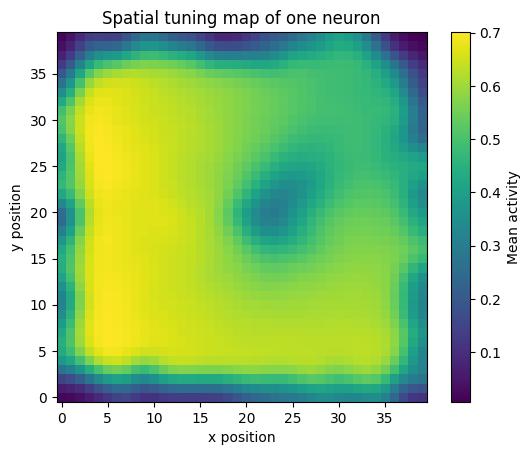

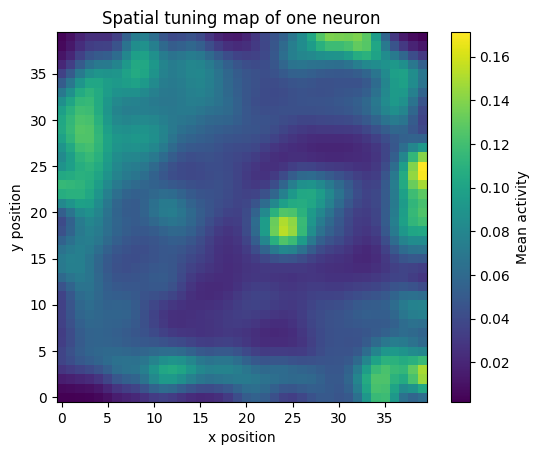

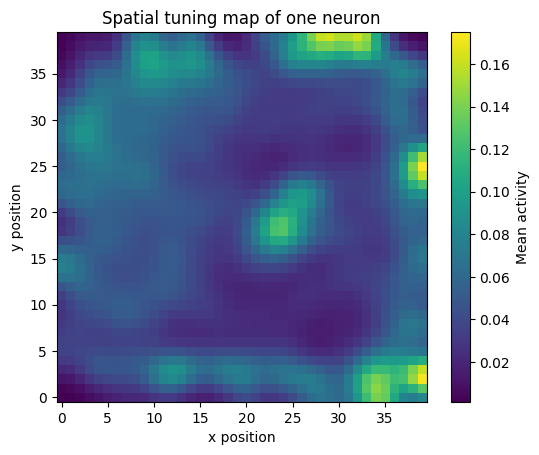

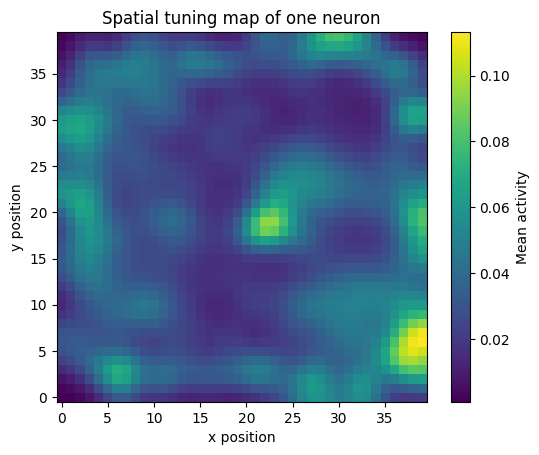

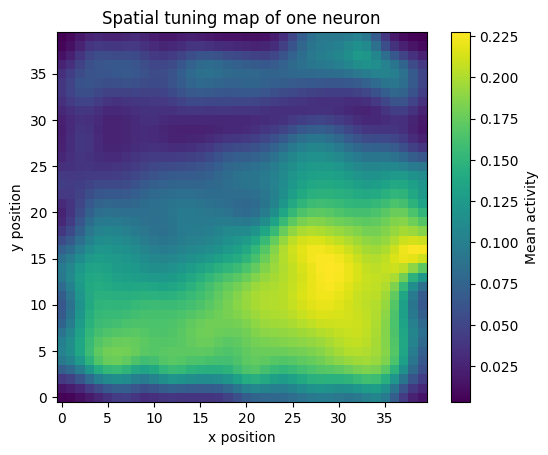

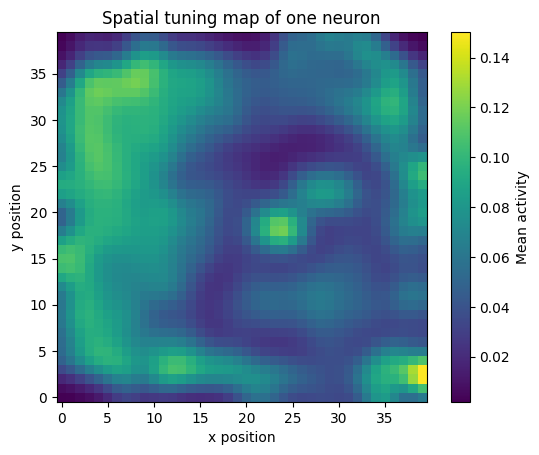

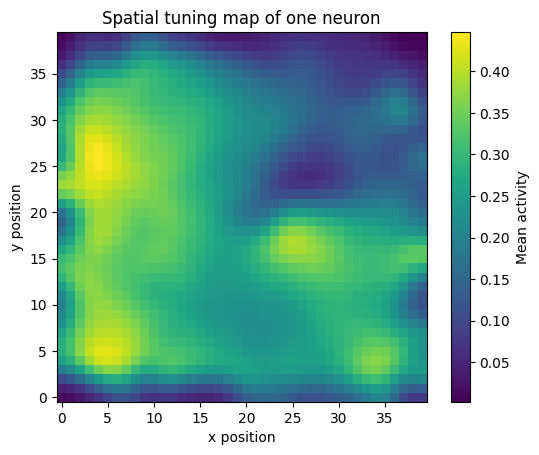

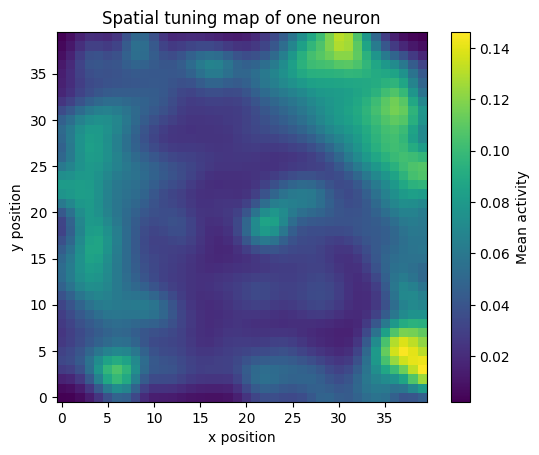

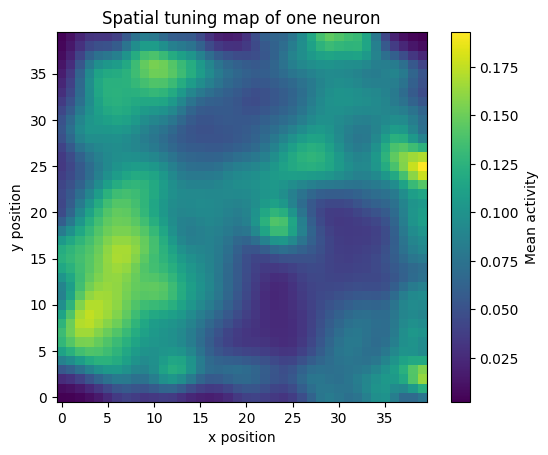

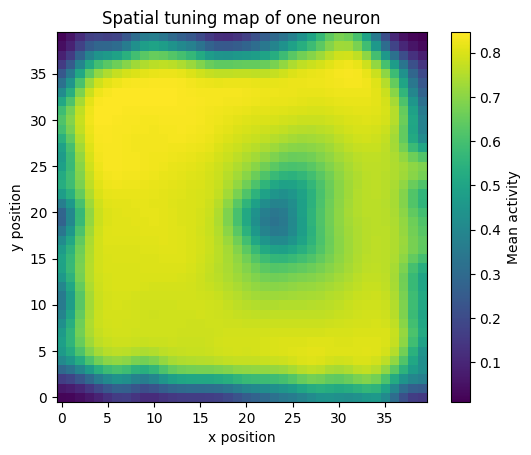

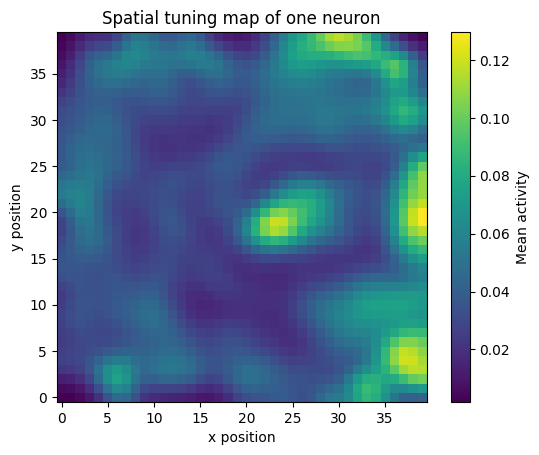

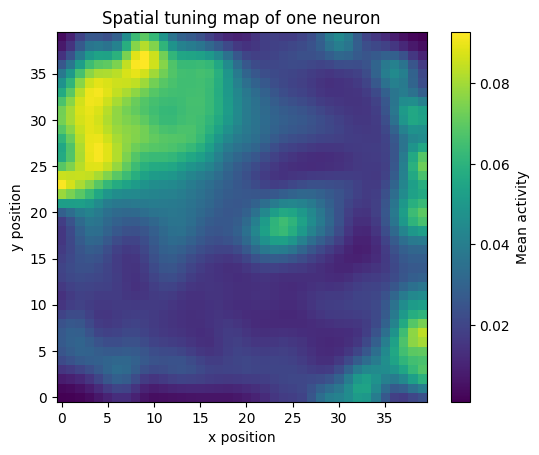

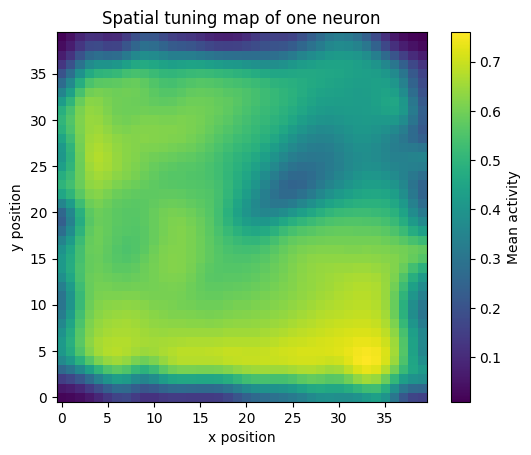

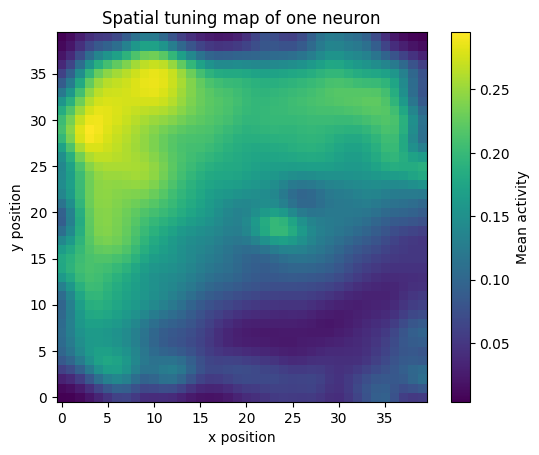

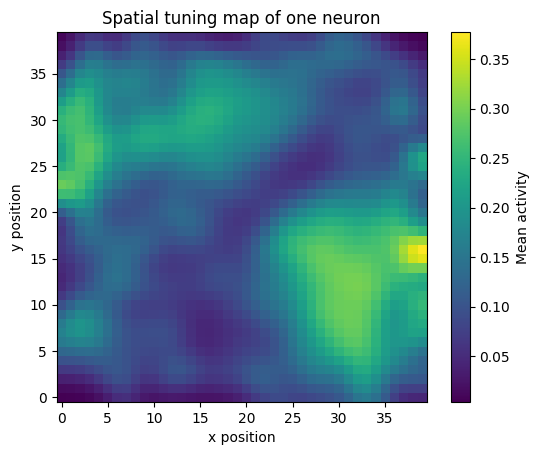

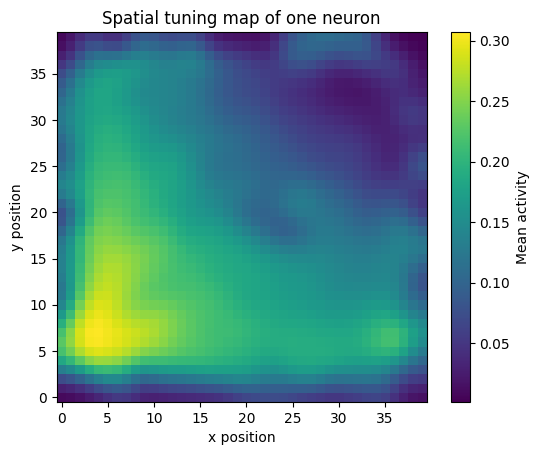

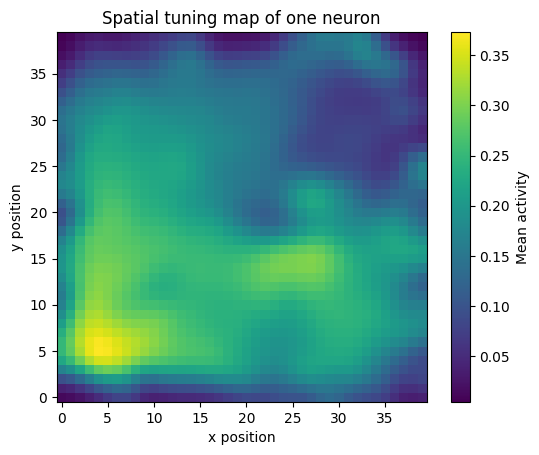

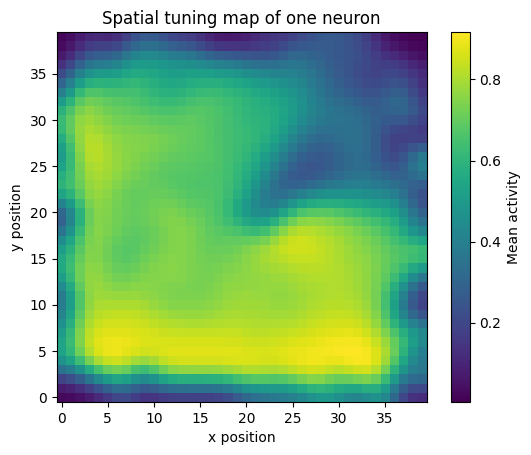

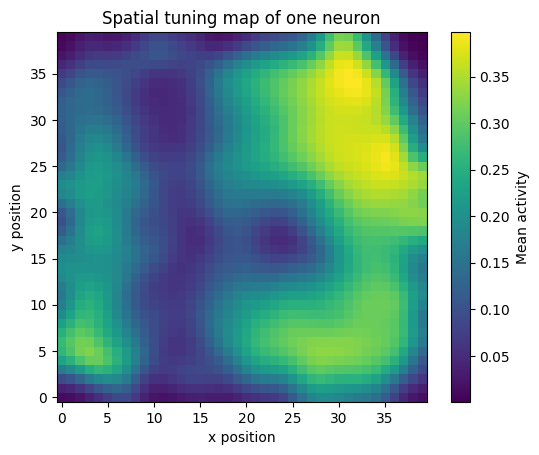

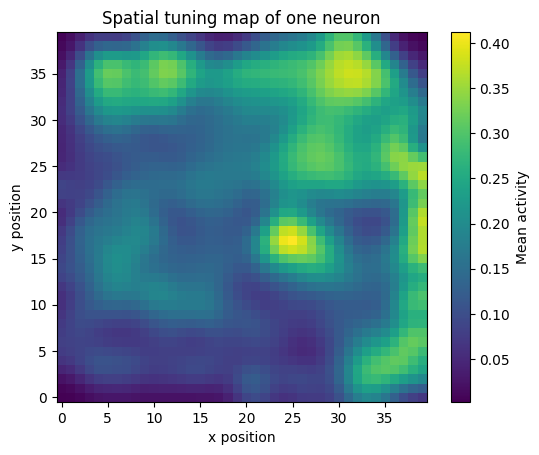

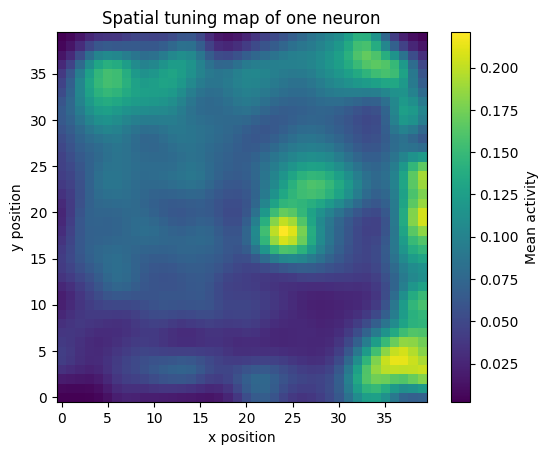

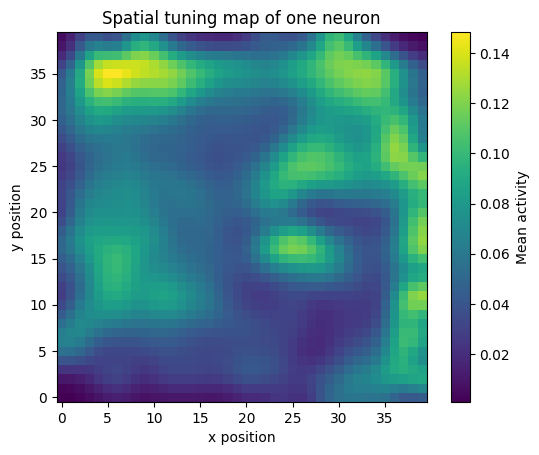

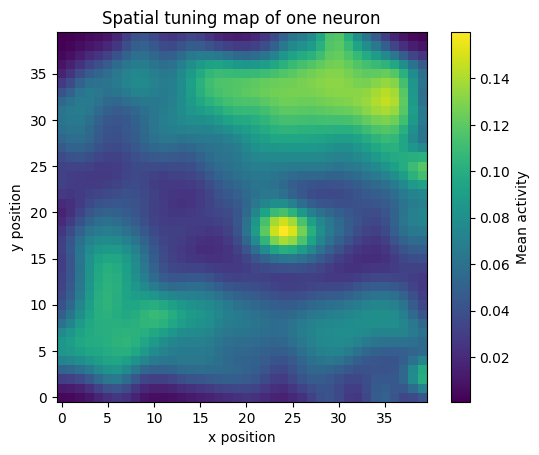

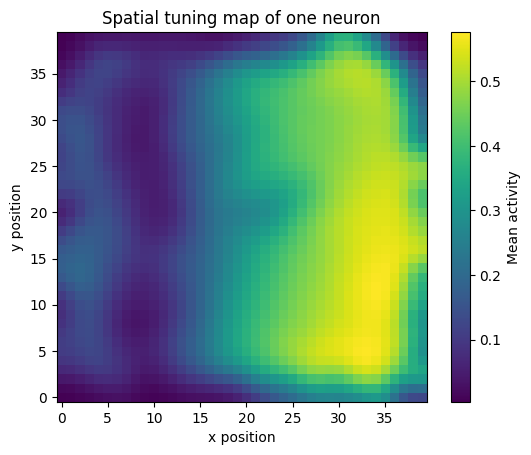

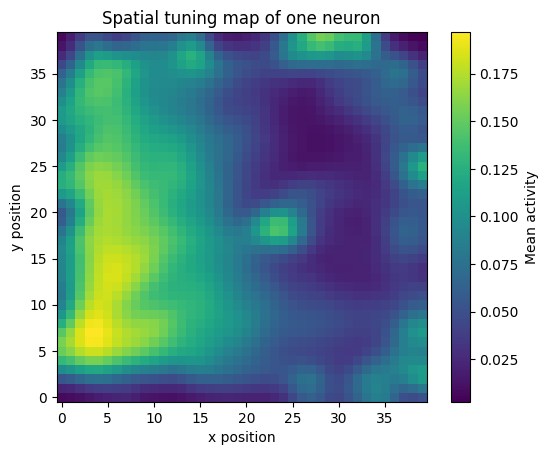

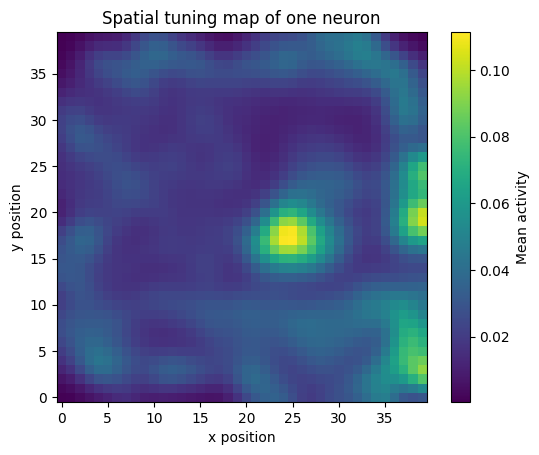

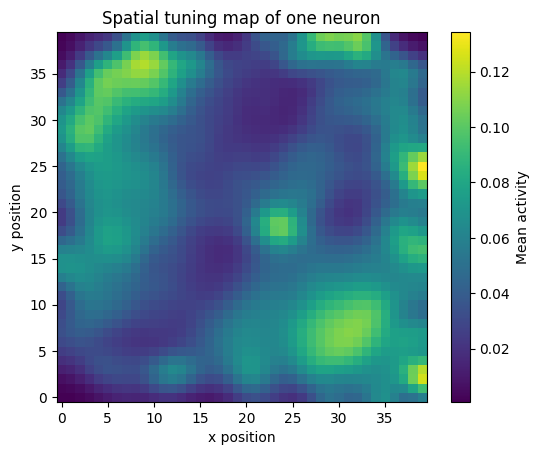

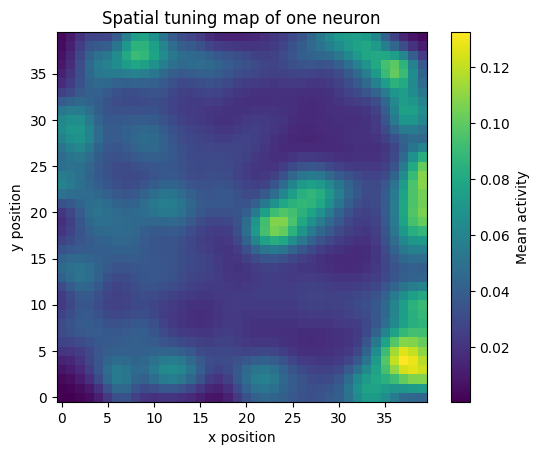

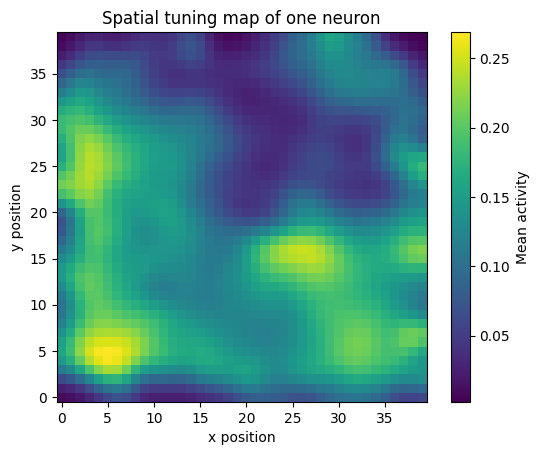

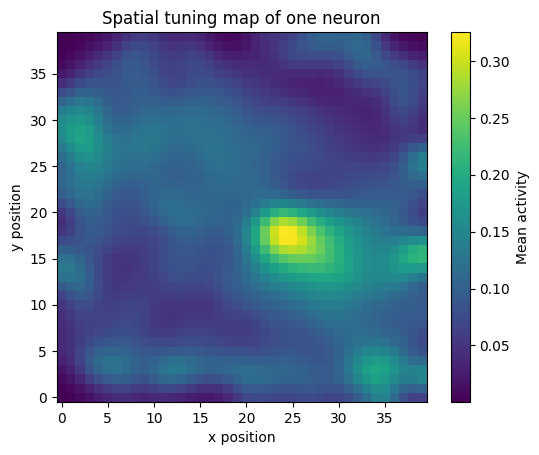

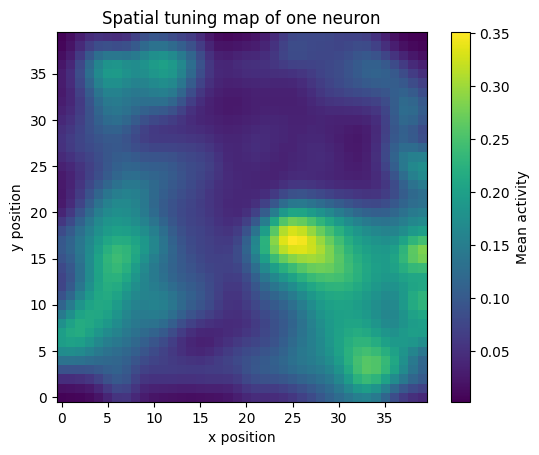

In [3]:
for i in range(visualizer.model.N):
    visualizer.plot_hist(maps[i])